# Supplementary figure 7

This notebook contains the functions used to construct the supplementary figure 7 in the paper. 

The figure represents the exon-centered nucleotide-excision repair efficiency. Find more details in the **Computing the activity of NER from XR-seq data** section of the paper.

The scripts used for this analysis (to generate the data for the plots in this notebook) can be found here other_scripts/repair_analysis_FigS7.tar.xz

In [1]:
%matplotlib inline

from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import numpy.polynomial.polynomial as poly
from os import path
import warnings
warnings.filterwarnings('ignore')

from python_scripts.plot_functions import config_plot_params

In [2]:
config_plot_params()

In [3]:
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from matplotlib.ticker import LogFormatter
from matplotlib import ticker

# for y-axis formating 
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 

In [4]:
# dipyrimidne frequency
dipy_freq = "results/dipyrimidine_cnt_exon_centred_perpos.tsv"

## Dipyrimidine XR-seq observed vs expected

In [5]:
def plot_repair_frequency_xrseq_dinc(repair, atype, pos, unique):
    '''exon-centered plot of xr-seq repair and dipyrimidine counts'''
    
    # type of dipyrimidines considered
    dipyr = {'TT':'AA', 'TC':'GA', 'CC':'GG', 'CT':'AG'}
    # CPD and 6-4PP repair in NHF1 (wild-type cell), CSB (CSB-mutant), and XPC (XPC-mutant) cells.
    xtypes_dic ={'CPD':['NHF1_CPD', 'CSB_CPD', 'XPC_CPD'], 'PP64':['NHF1_PP64_1h', 'CSB_PP64', 'XPC_PP64']}
    
    axs = []
    NROW = 3
    NCOL = 4

    fig = plt.figure(figsize=(7, 4))

    for row in range(0, NROW):
        for col in range(0, NCOL):
            axs.append(plt.subplot2grid((NROW, NCOL), (row, col)))
    count=0
    
    # first row: plot the frequency of dipyrimidines of each type in the exon-centered plot
    dinuc = pd.read_csv(dipy_freq, header=0, sep="\t")
    for nuc in ['TT', 'CT', 'TC', 'CC']:
        total = np.array(dinuc[[nuc, dipyr[nuc]]].sum(axis=1))
        
        coefs = poly.polyfit(dinuc['pos'], total, deg=50)
        ffit = poly.polyval(dinuc['pos'], coefs)

        axs[count].plot(dinuc['pos'], total, label='exp %s' % nuc, color='black', alpha=0.5, linewidth=0.7)
        axs[count].plot(dinuc['pos'], ffit, color='black', label='', linewidth=1 ) 
        
        axs[count].set_title(nuc)
        if nuc == "TT":
            axs[count].set_ylabel("freq. of dipyrimidines (fd)")
            
        axs[count].yaxis.major.locator.set_params(nbins=4) 
        axs[count].yaxis.set_major_formatter(formatter)
        axs[count].spines['right'].set_visible(False) 
        axs[count].spines['top'].set_visible(False)
        axs[count].set_xticks([-1000, -500, 0, 500, 1000])
        
        count+=1
    
    # second row: plot the freq. of dipyrimidines covered by atleast one XR-seq in NHF1 cell for CPD repair
    for xtype in ['NHF1_CPD']:

        dinuc_exp = pd.read_csv(dipy_freq, header=0, sep="\t")

        for nuc in ['TT', 'CT', 'TC', 'CC']:
            
            # frequency from xr-seq
            if unique == True:
                dinuc_xrseq = pd.read_csv("results/%s_exonCentered_%s_uniq.txt" % (xtype, pos), sep="\t", header=0)
            else:
                dinuc_xrseq = pd.read_csv("results/%s_exonCentered_%s.txt" % (xtype, pos), sep="\t", header=0)
                   
            # observed
            freq = np.array(dinuc_xrseq[nuc]+dinuc_xrseq[dipyr[nuc]])
                        
            coefs = poly.polyfit(dinuc_xrseq['position'], freq, deg=50)
            ffit = poly.polyval(dinuc_xrseq['position'], coefs)

            axs[count].plot(dinuc_xrseq['position'], freq, color='#377eb8', alpha=0.5, linewidth=0.7)
            axs[count].plot(dinuc_xrseq['position'], ffit, label="", color='#377eb8', linewidth=1)
            axs[count].legend(loc=1)

            if nuc == "TT":
                axs[count].set_ylabel("freq. of dipyrimidines \n covered by XR-seq reads (fdx)")
            
            axs[count].spines['right'].set_visible(False) 
            axs[count].spines['top'].set_visible(False)
            axs[count].set_xticks([-1000, -500, 0, 500, 1000])
            
            count+=1
        
   
    for xtype in ['NHF1_CPD']:

        dinuc_exp = pd.read_csv(dipy_freq, header=0, sep="\t")

        for nuc in ['TT', 'CT', 'TC', 'CC']:
            
            # frequency from xr-seq
            if unique == True:
                dinuc_xrseq = pd.read_csv("results/%s_exonCentered_%s_uniq.txt" % (xtype, pos), sep="\t", header=0)
            else:
                dinuc_xrseq = pd.read_csv("results/%s_exonCentered_%s.txt" % (xtype, pos), sep="\t", header=0)
                   
            # observed
            freq = np.array(dinuc_xrseq[nuc]+dinuc_xrseq[dipyr[nuc]])
            # expected frequency
            total = np.array(dinuc[[nuc, dipyr[nuc]]].sum(axis=1))
            #print(freq)
            #print(total)
            freq=freq/total;
            
            coefs = poly.polyfit(dinuc_xrseq['position'], freq, deg=50)
            ffit = poly.polyval(dinuc_xrseq['position'], coefs)

            axs[count].plot(dinuc_xrseq['position'], freq, color='#e41a1c', alpha=0.5, linewidth=0.7)
            axs[count].plot(dinuc_xrseq['position'], ffit, label="", color='#e41a1c', linewidth=1)
            axs[count].legend(loc=1)
                
            if nuc == "TT":
                axs[count].set_ylabel("Ration of fdx/fd")
            #if nuc == "CC":
                #axs2.set_ylabel("dipyr counts/1000")
            axs[count].legend(loc=2)  
            
            axs[count].spines['right'].set_visible(False) 
            axs[count].spines['top'].set_visible(False)
            axs[count].yaxis.major.locator.set_params(nbins=4) 
            axs[count].yaxis.set_major_formatter(formatter)
            axs[count].set_xticks([-1000, -500, 0, 500, 1000])
            
            count+=1
        
    plt.suptitle("%s pos:%s" % (atype, pos))
    plt.tight_layout()
    plt.savefig(path.join('figures', 'figureS7_NHF1_CPD_plot.svg'))
    plt.show()

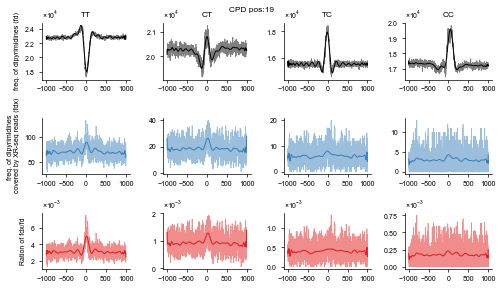

In [6]:
plot_repair_frequency_xrseq_dinc('CPD', 'CPD', 19, unique=False)

### bar plot

In [7]:
dipyr = {'TT':'AA', 'TC':'GA', 'CC':'GG', 'CT':'AG'}
expected = pd.read_csv("results/dipyrimidine_cnt_exon_intron.tsv", sep="\t", header=0)

xtypes_dic ={'CPD':['NHF1_CPD', 'CSB_CPD', 'XPC_CPD'], 'PP64':['NHF1_PP64_1h', 'CSB_PP64', 'XPC_PP64']}
xtypes_dic2 ={'CPD':['NHF1', 'CSB', 'XPC'], 'PP64':['NHF1', 'CSB', 'XPC']}


def plot_ratio(sel, pos):

    ratio={}
    oddsRatio = {}
    collect = {}

    for nuc in dipyr.keys():
        ratio[nuc] = {}

    for xtype in xtypes_dic[sel]:   
        oddsRatio[xtype]={}
        
        for nuc in dipyr.keys():
            ratio[nuc][xtype.split("_")[0]]={}

        for nuc in dipyr.keys():
            # frequency from xr-seq
            dinuc_xrseq = pd.read_csv("results/%s_exonCentered_total_%s_unique.txt" % (xtype, pos), sep="\t", header=0)        
            
            collect["%s:%s" % (nuc, xtype)]={}
            collect["%s:%s" % (nuc, xtype)]['intron_obs'] = dinuc_xrseq[dinuc_xrseq['region']=='intron'][[nuc, dipyr[nuc]]].sum(axis=1).values[0]
            collect["%s:%s" % (nuc, xtype)]['exon_obs'] = dinuc_xrseq[dinuc_xrseq['region']=='exon'][[nuc, dipyr[nuc]]].sum(axis=1).values[0]

            collect["%s:%s" % (nuc, xtype)]['intron_exp'] = expected[expected['pos']=='intron'][[nuc, dipyr[nuc]]].sum(axis=1).values[0]
            collect["%s:%s" % (nuc, xtype)]['exon_exp'] = expected[expected['pos']=='exon'][[nuc, dipyr[nuc]]].sum(axis=1).values[0]

            ratio[nuc][xtype.split("_")[0]]['intron'] = collect["%s:%s" % (nuc, xtype)]['intron_obs']/collect["%s:%s" % (nuc, xtype)]['intron_exp']
            ratio[nuc][xtype.split("_")[0]]['exon'] = collect["%s:%s" % (nuc, xtype)]['exon_obs']/collect["%s:%s" % (nuc, xtype)]['exon_exp']

            oddsRatio[xtype][nuc] =  ratio[nuc][xtype.split("_")[0]]['exon']/ratio[nuc][xtype.split("_")[0]]['intron']


    axs = []
    NROW = 1
    NCOL = 4

    fig = plt.figure(figsize=(3.5, 2))

    for row in range(0, NROW):
        for col in range(0, NCOL):
            axs.append(plt.subplot2grid((NROW, NCOL), (row, col)))

    count=0
    for nuc in ['TT', 'CT', 'TC', 'CC']:
        tmp_df = pd.DataFrame(ratio[nuc]).T
        tmp_df.loc[xtypes_dic2[sel]].plot(kind='bar', ax=axs[count], width=0.75, color=['blue', 'green'], legend=False)
        axs[count].set_title(nuc)
        #print(tmp_df.head())
        
        if nuc == 'TT':
            axs[count].set_ylabel("Ration of Fdx / Fd")
        
        axs[count].spines['right'].set_visible(False) 
        axs[count].spines['top'].set_visible(False)
        axs[count].yaxis.major.locator.set_params(nbins=4) 
        axs[count].yaxis.set_major_formatter(formatter)

        count+=1

    plt.tight_layout(w_pad=-0.5)
    plt.savefig("figures/figureS7_%s_%s.svg" % (sel, pos))
    plt.show()

CPD 19


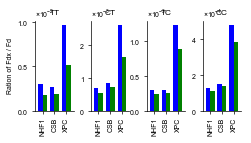

CPD 20


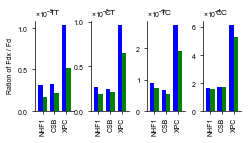

PP64 19


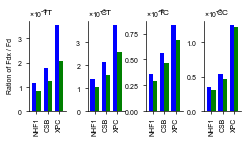

PP64 20


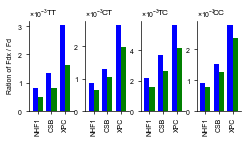

In [8]:
for pp in ['CPD', 'PP64']:
    for pos in [19, 20]:
        print(pp, pos)
        plot_ratio(pp, pos)